# Load libraries and data

In [1]:
import pandas as pd
import numpy as np

In [2]:
users = pd.read_csv(r"C:\Users\Sheng Miao\OneDrive\桌面\SpringBoard\Springboard_MyProjects\Take_home_challenge\relax_challenge\takehome_users.csv", encoding='ISO-8859-1')
engage = pd.read_csv(r"C:\Users\Sheng Miao\OneDrive\桌面\SpringBoard\Springboard_MyProjects\Take_home_challenge\relax_challenge\takehome_user_engagement.csv", encoding='ISO-8859-1')

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
users.shape

(12000, 10)

In [6]:
engage.shape

(207917, 3)

# Label Adopted Users

In [7]:
# Ensure timestamp is datetime
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'])
engage['date'] = engage['time_stamp'].dt.date

# Group by user and get list of unique login dates
user_dates = engage.groupby('user_id')['date'].apply(lambda x: sorted(set(x)))

user_dates

user_id
1                                             [2014-04-22]
2        [2013-11-15, 2013-11-29, 2013-12-09, 2013-12-2...
3                                             [2013-03-19]
4                                             [2013-05-22]
5                                             [2013-01-22]
                               ...                        
11996                                         [2013-09-06]
11997                                         [2013-01-15]
11998                                         [2014-04-27]
11999                                         [2012-06-02]
12000                                         [2014-01-26]
Name: date, Length: 8823, dtype: object

In [8]:

# Function to check 3 logins in any 7-day window
def is_adopted(dates):
    for i in range(len(dates) - 2):
        if (dates[i + 2] - dates[i]).days <= 7:
            return 1
    return 0

# Apply to all users
adopted = user_dates.apply(is_adopted).reset_index()
adopted.columns = ['user_id', 'adopted']

print(type(user_dates))
print(type(adopted))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
adopted

,user_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
8818,11996,0
8819,11997,0
8820,11998,0
8821,11999,0


# Merge with User Features

In [10]:
users_labeled = pd.merge(users, adopted, left_on='object_id', right_on='user_id', how='left')
users_labeled['adopted'] = users_labeled['adopted'].fillna(0).astype(int)

In [11]:
users_labeled.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5.0,0


In [12]:
adoption_rate = users_labeled['adopted'].mean()
print(f"Users adoption rate: {adoption_rate:.3f}")

Users adoption rate: 0.138


In [13]:
for col in users_labeled.columns:
    print(f"{col} unique value number is: {users_labeled[col].nunique()}")

object_id unique value number is: 12000
creation_time unique value number is: 11996
name unique value number is: 11355
email unique value number is: 11980
creation_source unique value number is: 5
last_session_creation_time unique value number is: 8821
opted_in_to_mailing_list unique value number is: 2
enabled_for_marketing_drip unique value number is: 2
org_id unique value number is: 417
invited_by_user_id unique value number is: 2564
user_id unique value number is: 8823
adopted unique value number is: 2


# Feature Engineering

In [14]:
import pandas as pd
import numpy as np

# Assuming users_labeled is your users DataFrame

# Convert to datetime
users_labeled['creation_time'] = pd.to_datetime(users_labeled['creation_time'])

# Convert Unix timestamp to datetime
users_labeled['last_session_creation_time'] = pd.to_datetime(users_labeled['last_session_creation_time'], unit='s')

# Time-related features
users_labeled['days_since_creation'] = (users_labeled['last_session_creation_time'] - users_labeled['creation_time']).dt.days
users_labeled['account_age_days'] = (users_labeled['last_session_creation_time'].max() - users_labeled['creation_time']).dt.days
users_labeled['creation_dayofweek'] = users_labeled['creation_time'].dt.dayofweek

# Email domain
users_labeled['email_domain'] = users_labeled['email'].str.split('@').str[-1]

# Binary flag: was invited
users_labeled['was_invited'] = users_labeled['invited_by_user_id'].notnull().astype(int)

# Drop unhelpful or high-cardinality columns
users_labeled.drop(columns=[
    'object_id', 'user_id', 'name', 'email', 'invited_by_user_id'
], inplace=True)

# Categorical encoding
cat_features = ['creation_source', 'email_domain', 'org_id']
users_labeled[cat_features] = users_labeled[cat_features].astype('category')

# Define features and target
X = users_labeled.drop(columns=['adopted'])
y = users_labeled['adopted']


In [15]:
users_labeled

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,days_since_creation,account_age_days,creation_dayofweek,email_domain,was_invited
0,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,0,0.0,45,1,yahoo.com,1
1,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1,136.0,203,4,gustr.com,1
2,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,0,0.0,443,1,gustr.com,1
3,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,0,1.0,381,1,yahoo.com,1
4,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,0,5.0,505,3,yahoo.com,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2013-09-06 06:14:15,ORG_INVITE,2013-09-06 06:14:15,0,0,89,0,0.0,273,4,gustr.com,1
11996,2013-01-10 18:28:37,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0,5.0,511,3,gmail.com,0
11997,2014-04-27 12:45:16,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,0,0.0,40,6,cuvox.de,1
11998,2012-05-31 11:55:59,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,0,2.0,736,3,iuxiw.com,0


In [16]:
import lightgbm
print(lightgbm.__version__)


4.6.0


In [17]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Drop datetime columns before training
X = X.drop(columns=['creation_time', 'last_session_creation_time'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create dataset
dtrain = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
dtest = lgb.Dataset(X_test, label=y_test, categorical_feature=cat_features)

# Train model
params = {
    'objective': 'binary',
    'metric': ['binary_logloss', 'average_precision'],
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'is_unbalance': True,
    'random_state': 42
}

model = lgb.train(params, dtrain, valid_sets=[dtrain, dtest])

# Predict
y_pred = model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2069
           1       0.85      0.90      0.88       331

    accuracy                           0.96      2400
   macro avg       0.92      0.94      0.93      2400
weighted avg       0.97      0.96      0.96      2400



# Precision recall thresholding curve

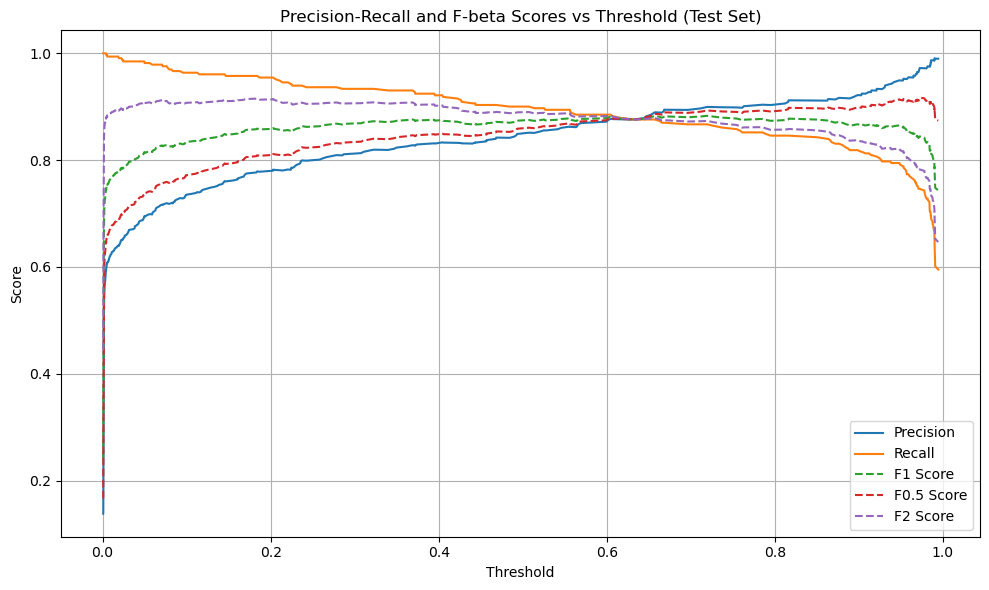

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve

# Predict probabilities on held-out test set
y_prob = model.predict(X_test)

# Precision–Recall Threshold Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute F-beta scores
def compute_fbeta(precision, recall, beta):
    beta_sq = beta ** 2
    return (1 + beta_sq) * (precision * recall) / (beta_sq * precision + recall + 1e-10)

# Remove last point in thresholds to match precision/recall length
thresholds = thresholds  # already computed
precision = precision[:-1]
recall = recall[:-1]

f1_scores = compute_fbeta(precision, recall, beta=1.0)
f05_scores = compute_fbeta(precision, recall, beta=0.5)
f2_scores = compute_fbeta(precision, recall, beta=2.0)

# Plot everything
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.plot(thresholds, f1_scores, label="F1 Score", linestyle="--")
plt.plot(thresholds, f05_scores, label="F0.5 Score", linestyle="--")
plt.plot(thresholds, f2_scores, label="F2 Score", linestyle="--")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall and F-beta Scores vs Threshold (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# SHAP analysis

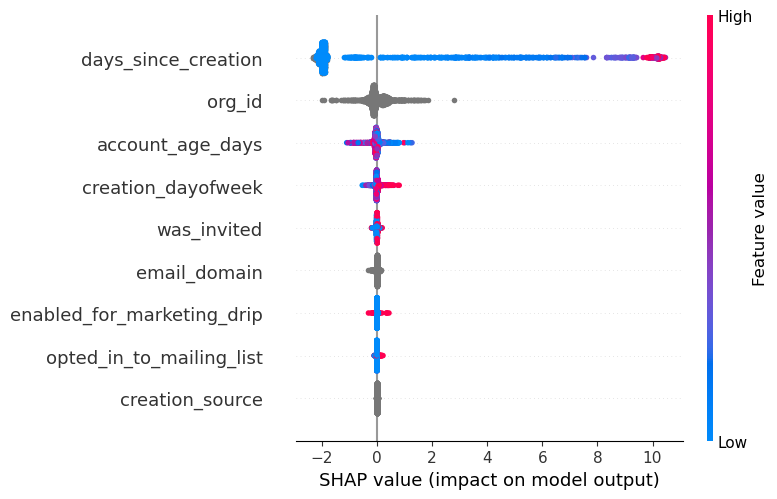

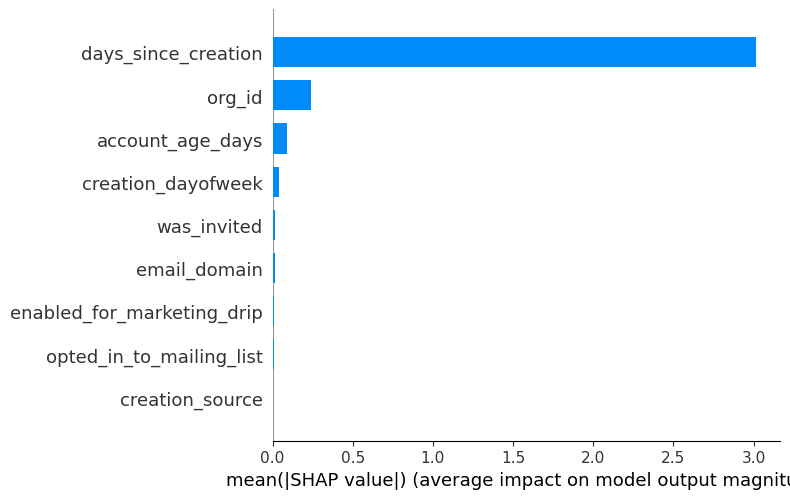

In [19]:
import shap

# Initialize SHAP explainer for LightGBM
explainer = shap.Explainer(model)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Beeswarm plot (summary)
shap.summary_plot(shap_values, X_test, plot_type="dot")

# Bar plot of mean(|SHAP|)
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Findings and insights

## Objective
To identify which factors best predict whether a user becomes an “adopted user,” defined as someone who logged into the product on **three separate days within at least one 7-day period**. The adoption rate in the dataset is **13.8%**, indicating a significant class imbalance.

## Methodology
I used a LightGBM classification model to predict user adoption based on user profile and behavior features. Given the class imbalance, the model was trained using a balanced approach (`is_unbalance=True`), and evaluated primarily using **average precision**, which is better suited for imbalanced data than accuracy or log loss.

To interpret model predictions and uncover key drivers of adoption, I used **SHAP (SHapley Additive exPlanations)** to assess the impact of each feature.

## Key Findings

- **1. `days_since_creation`** is the **most predictive factor**:
  - Users with a **higher value** (i.e., a long gap since account creation before their last session) were **much more likely** to be adopted.
  - High SHAP values are strongly concentrated at **high values** of `days_since_creation`, indicating recent active users are less likely to be adopted.

- **2. `org_id`** has moderate predictive power:
  - Certain organizations seem to foster adoption better than others, possibly due to internal onboarding processes or user needs.

- **3. `account_age_days`**:
  - This feature shows some importance, but its impact overlaps conceptually with `days_since_creation`. It may reflect long-term engagement potential but adds less incremental value.

- **4. Behavioral and marketing features like**:
  - `creation_dayofweek`, `was_invited`, `email_domain`, `enabled_for_marketing_drip`, `opted_in_to_mailing_list`, and `creation_source` were explored.
  - These showed **minimal predictive impact** based on SHAP importance values.

## Features Considered But Not Valuable
- `email_domain`, `creation_source`, and `marketing_drip` indicators were not found to contribute significantly.
- While we retained them during modeling, SHAP analysis showed near-zero influence on the model’s output.

## Recommendations & Next Steps
1. **Focus onboarding efforts** on users within the first few days of account creation to capitalize on the short window of high adoption likelihood.
2. Investigate **organizational patterns** in high-adopting `org_id`s — their practices could be modeled across other organizations.
3. **Additional Data Needed**:
   - Session-level engagement metrics (e.g., number of actions per session, feature usage).
   - User demographics or role types, if available.